# Number of Firms by Industry
### Connor Buxton, 1/16/22
The purpose of this code is two-fold, to serve as a way to create the visualizations needed for our report as well as to demonstrate the process of ETL and the steps taken.

The three parts of ETL are extraction, transformation, and loading. Extraction was done by getting information in the form of JSON from the Census Data API, which was then transformed by first cleaning the data and setting appropriate types and then transforming by selecting only the necessary information for each visualization, such as state. Thirdly, I took loading to mean we then created plots with this data, but if necessary we could export this data into the form of one or more CSV files or a single Excel file with multiple sheets for each location of interest.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

sns.set_theme(style='whitegrid')

The first part, Extraction, is handled by these first two cells. The first one defines a function which allows me to get a url more easily and the second does the heavy lifting of extracting the information from the API.

In [2]:
def getHTML(url):
    response = requests.get(url)
    return response

In [3]:
html = getHTML(r'https://api.census.gov/data/2018/abscs.html?get=NAME,NAICS2017_LABEL,FIRMPDEMP&for=state:55,27&NAICS2017=*&key=')
data = json.loads(html.text)
data_labels = data[0]
data_rows = data[1:]
state_df = pd.DataFrame(data_rows, columns=data_labels)
html = getHTML(r'https://api.census.gov/data/2018/abscs.html?get=NAME,NAICS2017_LABEL,FIRMPDEMP&for=us:*&NAICS2017=*&key=')
data = json.loads(html.text)
data_labels = data[0]
data_rows = data[1:]
us_df = pd.DataFrame(data_rows, columns=data_labels)

The below code marks the beginning of the transformation step, where I begin by cleaning the FIRMPDEMP column by converting it to a numeric type. This will be very important to creating visualizations, as it would not plot properly if this column was still the 'object' dtype.

In [4]:
state_df['FIRMPDEMP'] = pd.to_numeric(state_df['FIRMPDEMP'],errors='coerce')
us_df['FIRMPDEMP'] = pd.to_numeric(us_df['FIRMPDEMP'], errors='coerce')

Next, I grabbed the data from our state_df dataframe where the name is Minnesota, so that I could create a visualization with the focus on that state. I put this into a separate dataframe for plotting, which I would consider a transformation step as well. Some other cleaning steps needed to be taken here as well, such as setting the index to a different variable, and dropping the total count of firms for all industry sectors. I also sorted the values of the labels by reverse alphabetical order to get it in line with the Seaborn plots that appear later on.

In [12]:
mn_df = state_df[state_df['NAME'] == 'Minnesota']
mn_plot = mn_df[['FIRMPDEMP', 'NAICS2017_LABEL']]
mn_plot.set_index('NAICS2017_LABEL', inplace=True)
mn_plot.drop(index='Total for all sectors', inplace=True)
mn_plot.sort_values('NAICS2017_LABEL', inplace=True, ascending=False)

C:\Users\buxto\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\buxto\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Here, I plot the Minnesota data and use a couple of graph functions to remove the legend.

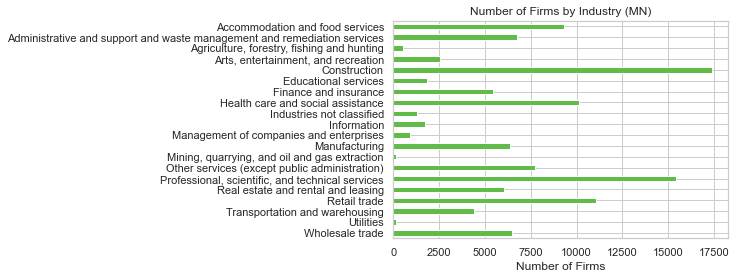

In [19]:
ax = mn_plot.plot(title='Number of Firms by Industry (MN)', kind='barh', color='#60BB48')
ax.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.gca().get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel('Number of Firms')
plt.show()

I then repeated the same process as before for Wisconsin.

In [14]:
wi_df = state_df[state_df['NAME'] == 'Wisconsin']
wi_plot = wi_df[['FIRMPDEMP', 'NAICS2017_LABEL']]
wi_plot.set_index('NAICS2017_LABEL', inplace=True)
wi_plot.drop(index='Total for all sectors', inplace=True)
wi_plot.sort_values('NAICS2017_LABEL', inplace=True, ascending=False)

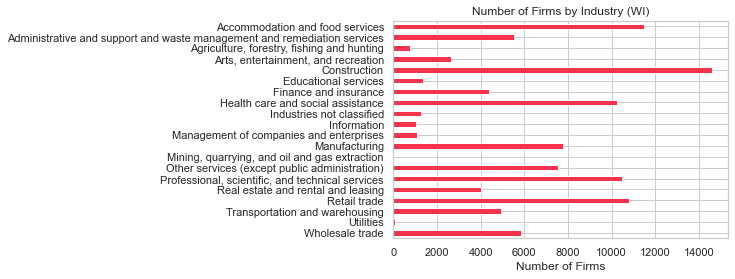

In [18]:
ax2 = wi_plot.plot(title='Number of Firms by Industry (WI)', kind='barh', color='#F3334B')
ax2.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.gca().get_legend().remove()
ax2.set_ylabel('')
ax2.set_xlabel('Number of Firms')
plt.show()

Here, I use the national level data I pulled and clean it similarly for plotting.

In [9]:
us_plot = us_df[['FIRMPDEMP','NAICS2017_LABEL']]
us_plot.set_index('NAICS2017_LABEL', inplace=True)
us_plot.drop(index='Total for all sectors', inplace=True)
us_plot.sort_values('NAICS2017_LABEL', inplace=True)

Finally, I plot the US data using the Seaborn package, making sure to set the proper labels and title.

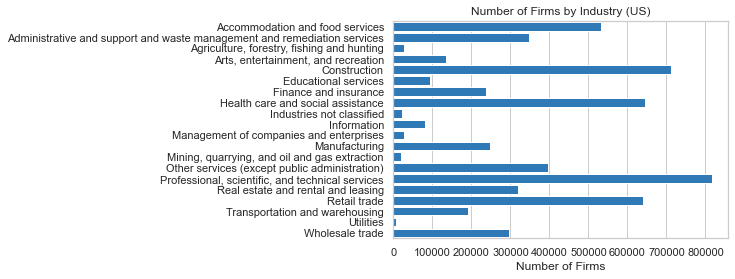

In [21]:
ax4 = sns.barplot(x = us_plot['FIRMPDEMP'], y = us_plot.index, color='#187BCD')
ax4.set(xlabel = 'Number of Firms', ylabel='', title='Number of Firms by Industry (US)')
plt.show()

At the end here, I have included code that would allow for loading the data to an Excel Spreadsheet with two sheets, one for state level data and one for US level data. It is commented out so that it doesn't automatically run, but I thought to include this as it would be the Load step of the ETL process.

In [24]:
#with pd.ExcelWriter('census_industry_firms.xlsx') as xlsxWriter:
#    state_df.to_excel(xlsxWriter, sheet_name='States')
#    us_df.to_excel(xlsxWriter, sheet_name='US')